In [1]:
import tensorflow as tf

In [2]:
image_size = (128,128)

In [3]:
test_ds = tf.keras.utils.image_dataset_from_directory("Cancer_test/", image_size=image_size)

Found 791 files belonging to 2 classes.


In [4]:
class_names = test_ds.class_names

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# The following lines are used for bypassing an error
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img/255)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [6]:
import random

def model_evaluation(model):
    test_loss, test_acc = model.evaluate(test_ds, verbose=2)
    
    random_batch = random.randint(0,test_ds.__len__()-1)
    test_DS = list(test_ds.as_numpy_iterator())
    predictions = model.predict(test_DS[random_batch][0])
    modified_predictions = []
    for i in predictions:
        if i[0]>0.5:
            modified_predictions.append([1-i[0],i[0]])
        else:
            modified_predictions.append([i[0],1-i[0]])
    predictions = modified_predictions
    
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    true_labels = []
    for i in test_DS[random_batch][1]:
        true_labels.append(i)
    
    
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], true_labels, test_DS[random_batch][0])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], true_labels)
    plt.tight_layout()
    plt.show()

25/25 - 3s - loss: 0.5522 - accuracy: 0.8521 - 3s/epoch - 115ms/step
1/1 [==============================] - 0s 178ms/step


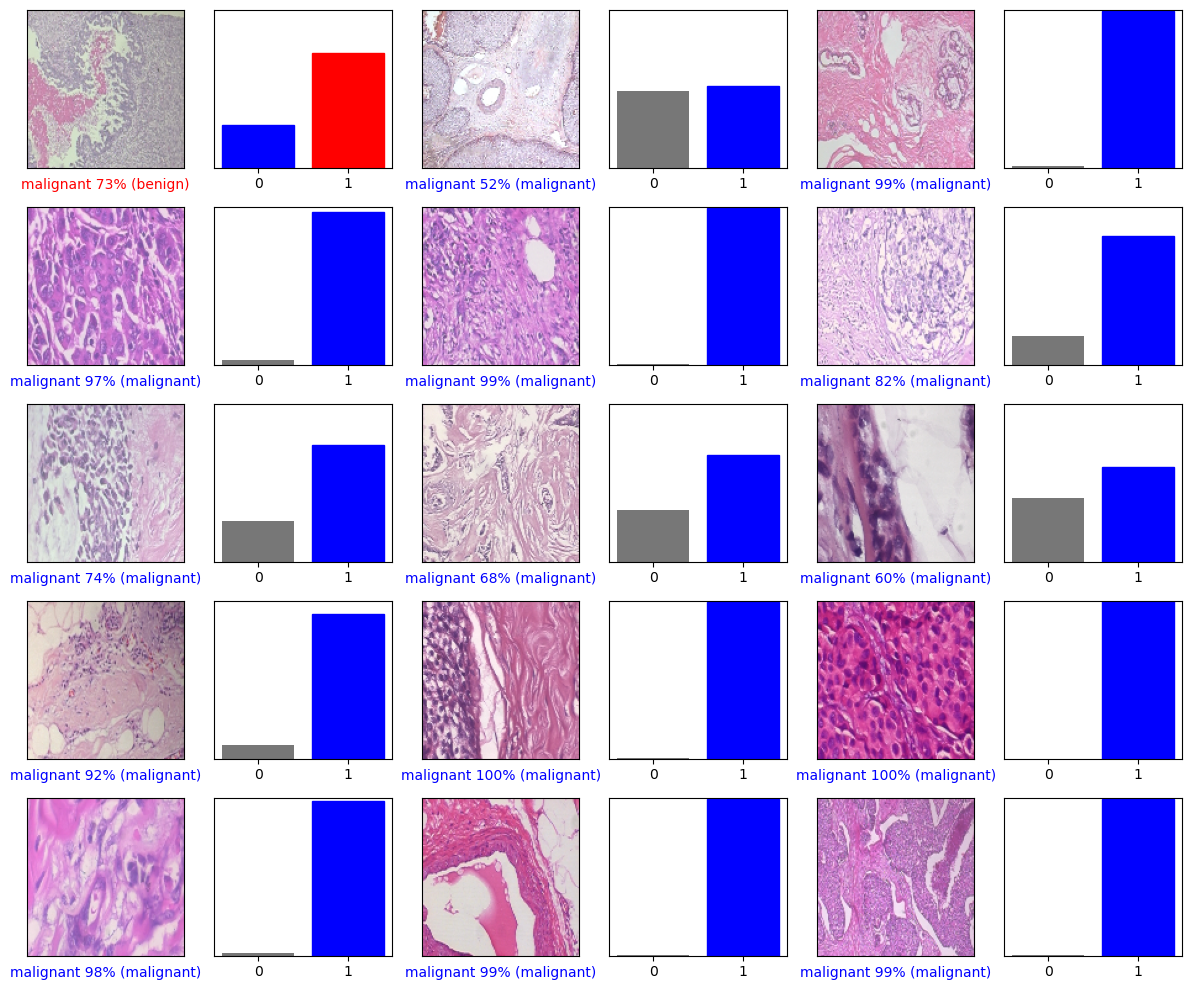

In [7]:
model = tf.keras.models.load_model('Best_model.h5')

model_evaluation(model)